In [1]:
import numpy as np

In [2]:
import tensorflow as tf

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sisyphus2.backend import analysis, visualizations, simulation_tools

In [5]:
from sisyphus2.backend.networks import Model

In [6]:
from sisyphus2.tasks import task

In [2]:
rdm = task.rdm()

In [3]:
gen = rdm.generate_train_trials()

In [5]:
gen.next()[0].shape

(128, 200, 1)

In [2]:
ff = task.flip_flop()

In [3]:
gen = ff.generate_train_trials()
gen.next()[0].shape

(128, 24, 2)

In [7]:
dm = task.delayed_memory()

In [8]:
gen = dm.generate_train_trials()
dat = gen.next()

In [9]:
trial = dat[0][1,:,:]
out = dat[1][1,:,:]

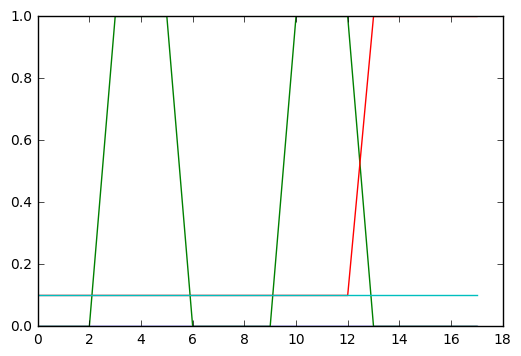

In [10]:
plt.plot(trial)
plt.plot(out)
plt.show()

In [11]:
params = dm.__dict__

In [12]:
model = Model(params)

In [13]:
learning_rate = .001 
training_iters = 3000
weights_path = '../weights/mem_sac.npz'
sess = tf.Session()
model.train(sess, gen, learning_rate = learning_rate, 
            training_iters = training_iters, weights_path = weights_path)
sess.close()

Iter 640, Minibatch Loss= 0.098315
Iter 1280, Minibatch Loss= 0.092551
Iter 1920, Minibatch Loss= 0.086426
Iter 2560, Minibatch Loss= 0.080626
Optimization Finished!
Model saved in file: ../weights/mem_sac.npz


In [14]:
sim = simulation_tools.Simulator(params, weights_path=weights_path)